# Explanations of warnings and how to get rid of them

Sometimes when you're working with *thebeat* you'll encounter warnings. While useful, they can of course become annoying at some point. Even though it's possible to simply disable all these warnings (see at the bottom of this page), we believe it's better practice to look into the origin of the warning, and solve it there. 

Below you'll find a number of common warnings and an explanation of where they originate.

In [25]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', message="Matplotlib ")

## Frame rounding

### What does the warning look like?

The warning looks like this:
    
> For one or more of the used sounds, the exact start or end positions in frames (i.e. samples) were rounded off to the neirest integer ceiling. This shouldn't be a problem. To get rid of this warning, try rounding off the onsets in the passed Sequence object by calling ``Sequence.round_onsets()`` before passing the object to the SoundSequence constructor.

### When can you encounter this warning?

### What is the reason for this warning?

### What is the solution?

### Example with warning

In [26]:
from thebeat import Sequence, SoundStimulus, SoundSequence

sound = SoundStimulus.generate()
sequence = Sequence.generate_random_normal(n_events=10, mu=500, sigma=25)
print(sequence)
ss = SoundSequence(sound, sequence)

Object of type Sequence (ends with event)
10 events
IOIs: [444.51396221 525.77918877 527.94594608 497.91419828 504.75847809
 473.077398   488.59626572 485.035576   506.50767845]
Onsets: [   0.          444.51396221  970.29315098 1498.23909706 1996.15329534
 2500.91177343 2973.98917144 3462.58543716 3947.62101316 4454.12869161]
Sequence name: Not provided



/Users/jellevanderwerff/thebeat-package/thebeat/core/soundsequence.py:356: Warning: For one or more of the used sounds, the exact start or end positions in frames (i.e. samples) were rounded off to the neirest integer ceiling. This shouldn't be a problem. To get rid of this warning, try rounding off the onsets in the passed Sequence objectby calling Sequence.round_onsets() before passing the object to the SoundSequence constructor.

  warnings.warn(thebeat._warnings.framerounding_soundseq)


### Example without warning

In [27]:
from thebeat import Sequence, SoundStimulus, SoundSequence

sound = SoundStimulus.generate()
sequence = Sequence.generate_random_normal(n_events=10, mu=500, sigma=25)
sequence.round_onsets(decimals=2)
print(sequence)
ss = SoundSequence(sound, sequence)

Object of type Sequence (ends with event)
10 events
IOIs: [548.21 501.67 484.72 434.08 512.46 480.61 525.25 525.19 478.29]
Onsets: [   0.    548.21 1049.88 1534.6  1968.68 2481.14 2961.75 3487.   4012.19
 4490.48]
Sequence name: Not provided



## Normalization

### What does the warning look like?

The warning looks like this:
    
> Sound was normalized to avoid distortion. If undesirable, change the amplitude of the sounds."

### When can you encounter this warning?

/Users/jellevanderwerff/thebeat-package/thebeat/helpers.py:254: Warning: Sound was normalized to avoid distortion. If undesirable, change the amplitude of the sounds.
  warnings.warn(thebeat._warnings.normalization)


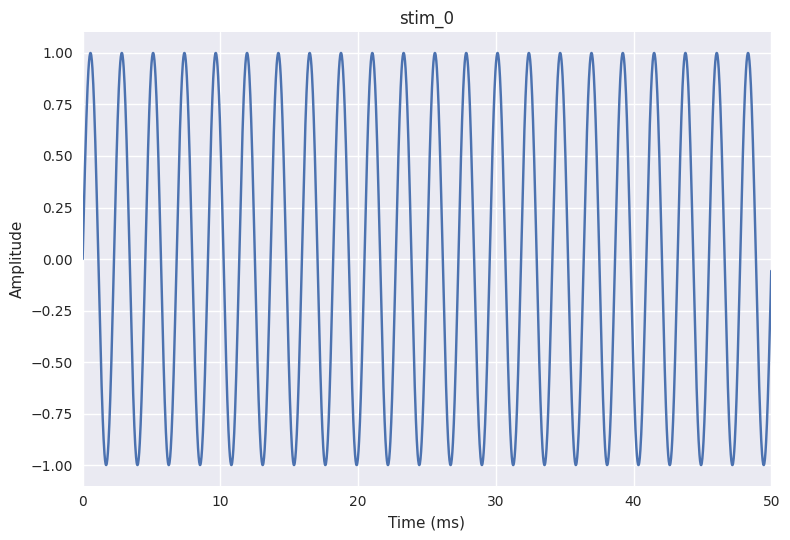

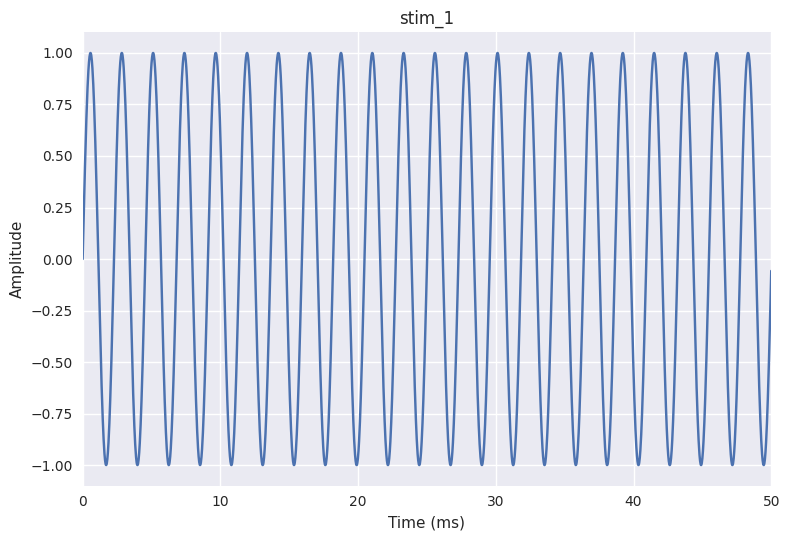

In [28]:
from thebeat import SoundStimulus

stim_0 = SoundStimulus.generate()
stim_0.plot_waveform(title="stim_0")
stim_1 = SoundStimulus.generate()
stim_1.plot_waveform(title="stim_1")

stim_overlayed = stim_0 + stim_1

As you can see the amplitudes of the two stimuli run from -1 to 1. When these sounds are overlayed both sounds' amplitudes are summed. The overlayed sound would therefore have amplitudes that run from -2 to 2, resulting in distorted sound. *thebeat* automatically normalizes the sound so that the amplitudes run from -1 to 1 again.

### What is the solution?

As the warning specifies, you can change the amplitude of the sounds before overlaying them. This also ensures that sounds with a different frequency will be equally loud, for instance:

In [29]:
from thebeat import SoundStimulus
stim_0 = SoundStimulus.generate(freq=220)
stim_0.change_amplitude(factor=0.7)
stim_1 = SoundStimulus.generate(freq=440)
stim_1.change_amplitude(factor=0.3)

stim_overlayed = stim_0 + stim_1

## Phase difference discarded

### What does the warning look like?

The warning looks like this:

> The first onset of the test sequence was at `t` = 0. This would result in a phase difference that is always 0, which is not very informative. As such, the first onset was discarded. If you want the first onset at a different time than zero, use the ``Sequence.from_onsets()`` method to create the Sequence object.

### When can you encounter this warning?

### What is the reason for this warning?

Consider the following sequences:

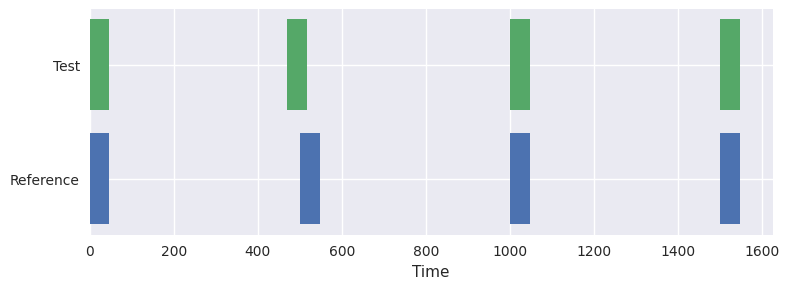

In [30]:
from thebeat import Sequence
from thebeat.visualization import plot_multiple_sequences

test_sequence = Sequence(iois=[470, 530, 500], name="Test")
reference_sequence = Sequence(iois=[500, 500, 500], name="Reference")

plot_multiple_sequences([test_sequence, reference_sequence], figsize=(8, 3));

/Users/jellevanderwerff/thebeat-package/thebeat/utils.py:66: Warning: The first onset of the test sequence was at t=0.
This would result in a phase difference that is always 0, which is not very informative.
As such, the first onset was discarded.
If you want the first onset at a different time than zero, use the Sequence.from_onsets() method to create the Sequence object.

  warnings.warn(phases_t_at_zero)


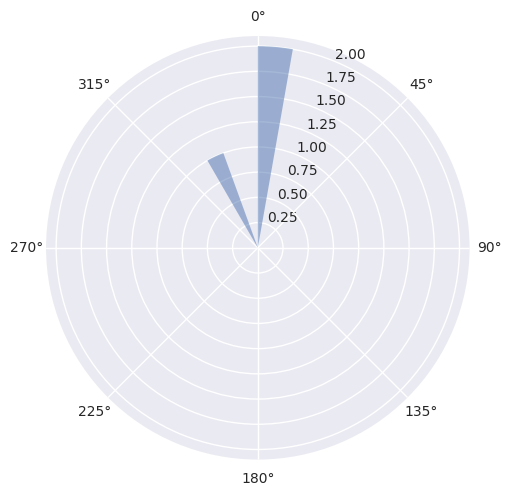

In [31]:
from thebeat.visualization import plot_phase_differences

plot_phase_differences(test_sequence=test_sequence, 
                       reference_sequence=reference_sequence);

### What is the solution?

/Users/jellevanderwerff/thebeat-package/thebeat/visualization.py:533: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


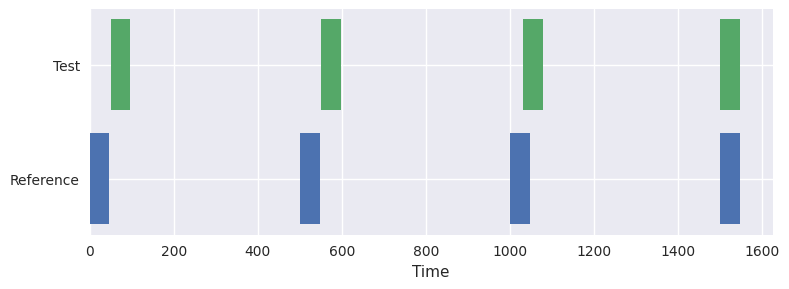

In [38]:
test_sequence = Sequence.from_onsets([50, 550, 1031, 1500], name="Test")
plot_multiple_sequences([test_sequence, reference_sequence], figsize=(8, 3));

Now we can plot the phase differences and not get the warning:

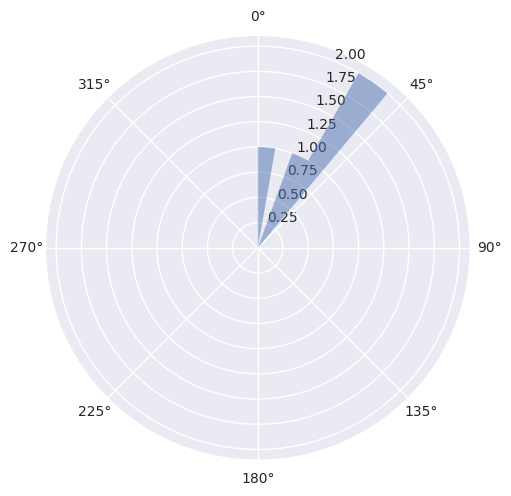

In [33]:
plot_phase_differences(test_sequence=test_sequence, 
                       reference_sequence=reference_sequence);

## Getting rid of all warnings
While it is better to find the cause of the warning and to solve it there, during development it might be frustrating to get these warnings, especially if you they are not relevant to your situation. To disable all of them place the following in your code:

In [34]:
import warnings
warnings.filterwarnings('ignore')

To reset them, use:

In [37]:
warnings.resetwarnings()